In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# WRANGLING THE FIRST DATAFRAME:

In [153]:
df1 = pd.read_csv('fifa_ranking-2019-12-19.csv')

df1.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43935,1,Belgium,BEL,1765,10706050,0,UEFA,2019-12-19
1,43946,2,France,FRA,1733,10703030,0,UEFA,2019-12-19
2,43924,3,Brazil,BRA,1712,10701020,0,CONMEBOL,2019-12-19
3,43942,4,England,ENG,1661,10606010,0,UEFA,2019-12-19
4,43930,5,Uruguay,URU,1645,10604050,0,CONMEBOL,2019-12-19


In [154]:
df1.tail()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
60749,43825,161,Lebanon,LBN,0,0,0,AFC,1992-12-31
60750,43895,162,Bahamas,BAH,0,0,0,CONCACAF,1992-12-31
60751,43828,163,Maldives,MDV,0,0,0,AFC,1992-12-31
60752,43877,163,Rwanda,RWA,0,0,0,CAF,1992-12-31
60753,43882,163,Somalia,SOM,0,0,0,CAF,1992-12-31


In [155]:
df1.columns

Index(['id', 'rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date'],
      dtype='object')

In [156]:
df1.shape

(60754, 9)

In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60754 entries, 0 to 60753
Data columns (total 9 columns):
id                 60754 non-null int64
rank               60754 non-null int64
country_full       60754 non-null object
country_abrv       60754 non-null object
total_points       60754 non-null int64
previous_points    60754 non-null int64
rank_change        60754 non-null int64
confederation      60754 non-null object
rank_date          60754 non-null object
dtypes: int64(5), object(4)
memory usage: 4.2+ MB


In [158]:
#Removing duplicates to try and minimize the size of the final dataframe (reduced by almost 2000 rows)
df1 = df1.drop_duplicates()
df1

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43935,1,Belgium,BEL,1765,10706050,0,UEFA,2019-12-19
1,43946,2,France,FRA,1733,10703030,0,UEFA,2019-12-19
2,43924,3,Brazil,BRA,1712,10701020,0,CONMEBOL,2019-12-19
3,43942,4,England,ENG,1661,10606010,0,UEFA,2019-12-19
4,43930,5,Uruguay,URU,1645,10604050,0,CONMEBOL,2019-12-19
...,...,...,...,...,...,...,...,...,...
60749,43825,161,Lebanon,LBN,0,0,0,AFC,1992-12-31
60750,43895,162,Bahamas,BAH,0,0,0,CONCACAF,1992-12-31
60751,43828,163,Maldives,MDV,0,0,0,AFC,1992-12-31
60752,43877,163,Rwanda,RWA,0,0,0,CAF,1992-12-31


In [159]:
df1 = df1[['country_full', 'rank', 'total_points', 'rank_date']]
df1.head()

,country_full,rank,total_points,rank_date
0,Belgium,1,1765,2019-12-19
1,France,2,1733,2019-12-19
2,Brazil,3,1712,2019-12-19
3,England,4,1661,2019-12-19
4,Uruguay,5,1645,2019-12-19


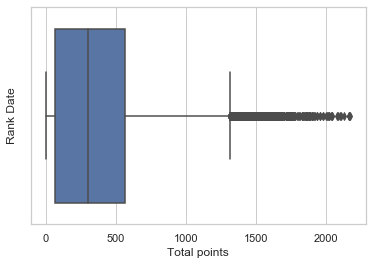

In [160]:
_ = sns.boxplot(x = 'total_points', data = df1)
_ = plt.xlabel('Total points')
_ = plt.ylabel('Rank Date')

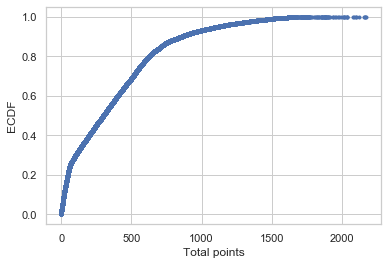

In [161]:
x = np.sort(df1['total_points'])
y = np.arange(1, len(x) + 1)/ len(x)

_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Total points')
_ = plt.ylabel('ECDF')

In [162]:
df1[df1['total_points'] >= 1800]

,country_full,rank,total_points,rank_date
2739,Germany,1,2172,2018-07-01
2740,France,2,2164,2018-07-01
2741,Portugal,3,2163,2018-07-01
2742,Brazil,4,2160,2018-07-01
2743,Belgium,5,2124,2018-07-01
2744,Spain,6,2104,2018-07-01
2745,England,7,2099,2018-07-01
2746,Switzerland,8,2087,2018-07-01
2747,Argentina,9,2080,2018-07-01
2748,Mexico,10,2041,2018-07-01


# INTERESTING FINDING: POINTS BUMP DURING TOURNAMENT YEARS?
There seems to be extreme values (around 1800 points) in the 'total_points' column. After inspecting the “total_points” column, I realized that the total points in 2018 were higher than in all other years (including 2019) which is a bit counterintuitive. This might be because that year was when the world cup was held so maybe there’s a points bump for countries that participate in the tournament. 

In [163]:
df1['country'] = df1['country_full']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
df1

,country_full,rank,total_points,rank_date,country
0,Belgium,1,1765,2019-12-19,Belgium
1,France,2,1733,2019-12-19,France
2,Brazil,3,1712,2019-12-19,Brazil
3,England,4,1661,2019-12-19,England
4,Uruguay,5,1645,2019-12-19,Uruguay
...,...,...,...,...,...
60749,Lebanon,161,0,1992-12-31,Lebanon
60750,Bahamas,162,0,1992-12-31,Bahamas
60751,Maldives,163,0,1992-12-31,Maldives
60752,Rwanda,163,0,1992-12-31,Rwanda


In [165]:
#Renaming 'rank-date' column to 'date', in preparation for merge with df1
df1['date'] = df1['rank_date']
df1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country_full,rank,total_points,rank_date,country,date
0,Belgium,1,1765,2019-12-19,Belgium,2019-12-19
1,France,2,1733,2019-12-19,France,2019-12-19
2,Brazil,3,1712,2019-12-19,Brazil,2019-12-19
3,England,4,1661,2019-12-19,England,2019-12-19
4,Uruguay,5,1645,2019-12-19,Uruguay,2019-12-19
...,...,...,...,...,...,...
60749,Lebanon,161,0,1992-12-31,Lebanon,1992-12-31
60750,Bahamas,162,0,1992-12-31,Bahamas,1992-12-31
60751,Maldives,163,0,1992-12-31,Maldives,1992-12-31
60752,Rwanda,163,0,1992-12-31,Rwanda,1992-12-31


# CHOOSING DF1 COLUMNS TO FOCUS ON
The 'total_points' column serves a similar purpose as the 'rank' column which doesn't have the outliers. I decided to keep the 'rank' column to show a country's improvement in place of the 'total_points column. I also decided to include the 'date' column to complete tracking of improvement and the 'country' column.

In [166]:
df1 = df1[['rank', 'date', 'country']]

In [167]:
df1

,rank,date,country
0,1,2019-12-19,Belgium
1,2,2019-12-19,France
2,3,2019-12-19,Brazil
3,4,2019-12-19,England
4,5,2019-12-19,Uruguay
...,...,...,...
60749,161,1992-12-31,Lebanon
60750,162,1992-12-31,Bahamas
60751,163,1992-12-31,Maldives
60752,163,1992-12-31,Rwanda


In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60754 entries, 0 to 60753
Data columns (total 3 columns):
rank       60754 non-null int64
date       60754 non-null object
country    60754 non-null object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [169]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#The date column in df1 is object. Changing to numerical
df1['date'] = df1['date'].str.replace("-","")
df1['date'] = df1['date'].astype(int)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60754 entries, 0 to 60753
Data columns (total 3 columns):
rank       60754 non-null int64
date       60754 non-null int64
country    60754 non-null object
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


# WRANGLING THE SECOND DATAFRAME

In [171]:
df2 = pd.read_excel('Migrants+World+Cup+1930-2018+HARVARD.xlsx')

df2

,Name Football Player,International,Date of birth,Place of birth,Country of birth,Nationality Father,Nationality Mother,Nationality Grandfather,Nationality Grandmother,Foreign-born,Contextual-Nationality,FIFA World Cup
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,5 May 1905,Avellaneda,Argentina,NaN,NaN,NaN,NaN,0,0,1930
1,Juan Botasso,Argentina,23 October 1905,Buenos Aires,Argentina,NaN,NaN,NaN,NaN,0,0,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,23 Ferbruary 1907,Barracas,Argentina,NaN,NaN,NaN,NaN,0,0,1930
3,Alberto Chividini,Argentina,23 February 1907,Buenos Aires,Argentina,NaN,NaN,NaN,NaN,0,0,1930
4,"Attilio José Demaria (""Attilio Demaria"")",Argentina,19 March 1909,Buenos Aires,Argentina,Argentina,Argentina,NaN,NaN,0,0,1930
...,...,...,...,...,...,...,...,...,...,...,...,...
10132,M'Baye Niang,Senegal,1994-12-19 00:00:00,Meulan-en-Yvelines,France,Senegal,Senegal,NaN,NaN,1,0,2018
10133,Keita Baldé,Senegal,8 March 1995,Arbúcies,Spain,Senegal,Senegal,NaN,NaN,1,0,2018
10134,Lamine Gassama,Senegal,20 October 1989,Marseille,France,Senegal,Senegal,NaN,NaN,1,0,2018
10135,Moussa Wagué,Senegal,4 October 1998,Bignona,Senegal,NaN,NaN,NaN,NaN,0,0,2018


In [172]:
df2.columns

Index(['Name Football Player', 'International ', 'Date of birth',
       'Place of birth ', 'Country of birth', 'Nationality Father',
       'Nationality Mother', 'Nationality Grandfather',
       'Nationality Grandmother', 'Foreign-born', 'Contextual-Nationality',
       'FIFA World Cup'],
      dtype='object')

In [173]:
#Removing duplicates to try and minimize the size of the final dataframe
df2  = df2.drop_duplicates()
df2

,Name Football Player,International,Date of birth,Place of birth,Country of birth,Nationality Father,Nationality Mother,Nationality Grandfather,Nationality Grandmother,Foreign-born,Contextual-Nationality,FIFA World Cup
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,5 May 1905,Avellaneda,Argentina,NaN,NaN,NaN,NaN,0,0,1930
1,Juan Botasso,Argentina,23 October 1905,Buenos Aires,Argentina,NaN,NaN,NaN,NaN,0,0,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,23 Ferbruary 1907,Barracas,Argentina,NaN,NaN,NaN,NaN,0,0,1930
3,Alberto Chividini,Argentina,23 February 1907,Buenos Aires,Argentina,NaN,NaN,NaN,NaN,0,0,1930
4,"Attilio José Demaria (""Attilio Demaria"")",Argentina,19 March 1909,Buenos Aires,Argentina,Argentina,Argentina,NaN,NaN,0,0,1930
...,...,...,...,...,...,...,...,...,...,...,...,...
10132,M'Baye Niang,Senegal,1994-12-19 00:00:00,Meulan-en-Yvelines,France,Senegal,Senegal,NaN,NaN,1,0,2018
10133,Keita Baldé,Senegal,8 March 1995,Arbúcies,Spain,Senegal,Senegal,NaN,NaN,1,0,2018
10134,Lamine Gassama,Senegal,20 October 1989,Marseille,France,Senegal,Senegal,NaN,NaN,1,0,2018
10135,Moussa Wagué,Senegal,4 October 1998,Bignona,Senegal,NaN,NaN,NaN,NaN,0,0,2018


# REMOVING WHITESPACE IN COLUMN NAMES
The "International" column in df2 has a space at the end of the name which is not conducive to slicing so I eliminated all whitespace from the names of the columns.

In [174]:
df2.columns = [c.replace(' ', '') for c in df2.columns]
df2.columns

Index(['NameFootballPlayer', 'International', 'Dateofbirth', 'Placeofbirth',
       'Countryofbirth', 'NationalityFather', 'NationalityMother',
       'NationalityGrandfather', 'NationalityGrandmother', 'Foreign-born',
       'Contextual-Nationality', 'FIFAWorldCup'],
      dtype='object')

In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10136
Data columns (total 12 columns):
NameFootballPlayer        10129 non-null object
International             10129 non-null object
Dateofbirth               10129 non-null object
Placeofbirth              10129 non-null object
Countryofbirth            10129 non-null object
NationalityFather         1190 non-null object
NationalityMother         1129 non-null object
NationalityGrandfather    175 non-null object
NationalityGrandmother    129 non-null object
Foreign-born              10129 non-null int64
Contextual-Nationality    10129 non-null int64
FIFAWorldCup              10129 non-null int64
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


# CHOOSING DF2 COLUMNS TO FOCUS ON: 
I decided to focus on these columns for my final analysis: 'NameFootballPlayer', 'International', 'Foreign-born', 'FIFAWorldCup'. The first one gives us the name of the football player while the second column indicates which country they played for in the World Cup. The 'FIFAWorldCup' column indicates which year the player participated in the World Cup. The 'Foreign-born' column indicates whether or not the player was born in the country they played for (0) or not (1) so I transformed it into a Boolean type column.

In preparation for a merge with DF1 I renamed the 'International' column to 'country' and the 'FIFAWorldCup' column to 'date'.

In [176]:
cols = ['NameFootballPlayer', 'International','Foreign-born', 'FIFAWorldCup' ]
df2 = df2[cols]
df2.head()

,NameFootballPlayer,International,Foreign-born,FIFAWorldCup
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,0,1930
1,Juan Botasso,Argentina,0,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,0,1930
3,Alberto Chividini,Argentina,0,1930
4,"Attilio José Demaria (""Attilio Demaria"")",Argentina,0,1930


In [177]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10136
Data columns (total 4 columns):
NameFootballPlayer    10129 non-null object
International         10129 non-null object
Foreign-born          10129 non-null int64
FIFAWorldCup          10129 non-null int64
dtypes: int64(2), object(2)
memory usage: 395.7+ KB


In [178]:
df2['Foreign-born'] = df2['Foreign-born'].astype(bool)
df2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,NameFootballPlayer,International,Foreign-born,FIFAWorldCup
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,False,1930
1,Juan Botasso,Argentina,False,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,False,1930
3,Alberto Chividini,Argentina,False,1930
4,"Attilio José Demaria (""Attilio Demaria"")",Argentina,False,1930
...,...,...,...,...
10132,M'Baye Niang,Senegal,True,2018
10133,Keita Baldé,Senegal,True,2018
10134,Lamine Gassama,Senegal,True,2018
10135,Moussa Wagué,Senegal,False,2018


In [179]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10136
Data columns (total 4 columns):
NameFootballPlayer    10129 non-null object
International         10129 non-null object
Foreign-born          10129 non-null bool
FIFAWorldCup          10129 non-null int64
dtypes: bool(1), int64(1), object(2)
memory usage: 326.4+ KB


In [180]:
#Renaming 'International' column to 'country'
df2['country'] = df2['International']
df2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NameFootballPlayer,International,Foreign-born,FIFAWorldCup,country
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,False,1930,Argentina
1,Juan Botasso,Argentina,False,1930,Argentina
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,False,1930,Argentina
3,Alberto Chividini,Argentina,False,1930,Argentina
4,"Attilio José Demaria (""Attilio Demaria"")",Argentina,False,1930,Argentina
...,...,...,...,...,...
10132,M'Baye Niang,Senegal,True,2018,Senegal
10133,Keita Baldé,Senegal,True,2018,Senegal
10134,Lamine Gassama,Senegal,True,2018,Senegal
10135,Moussa Wagué,Senegal,False,2018,Senegal


In [181]:
df2 = df2[['NameFootballPlayer', 'Foreign-born', 'FIFAWorldCup', 'country']]
df2

,NameFootballPlayer,Foreign-born,FIFAWorldCup,country
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,False,1930,Argentina
1,Juan Botasso,False,1930,Argentina
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",False,1930,Argentina
3,Alberto Chividini,False,1930,Argentina
4,"Attilio José Demaria (""Attilio Demaria"")",False,1930,Argentina
...,...,...,...,...
10132,M'Baye Niang,True,2018,Senegal
10133,Keita Baldé,True,2018,Senegal
10134,Lamine Gassama,True,2018,Senegal
10135,Moussa Wagué,False,2018,Senegal


In [182]:
#Renaming 'FIFAWorldCup' column to 'date' in preparation for merge
df2['date'] = df2['FIFAWorldCup']
df2


,NameFootballPlayer,Foreign-born,FIFAWorldCup,country,date
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,False,1930,Argentina,1930
1,Juan Botasso,False,1930,Argentina,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",False,1930,Argentina,1930
3,Alberto Chividini,False,1930,Argentina,1930
4,"Attilio José Demaria (""Attilio Demaria"")",False,1930,Argentina,1930
...,...,...,...,...,...
10132,M'Baye Niang,True,2018,Senegal,2018
10133,Keita Baldé,True,2018,Senegal,2018
10134,Lamine Gassama,True,2018,Senegal,2018
10135,Moussa Wagué,False,2018,Senegal,2018


In [183]:
df2 = df2[['NameFootballPlayer', 'Foreign-born', 'country', 'date']]
df2.head(20)

,NameFootballPlayer,Foreign-born,country,date
0,Ángel Fernando Bossio Garcilández (Ángel Bossi...,False,Argentina,1930
1,Juan Botasso,False,Argentina,1930
2,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",False,Argentina,1930
3,Alberto Chividini,False,Argentina,1930
4,"Attilio José Demaria (""Attilio Demaria"")",False,Argentina,1930
5,José Della Torre,False,Argentina,1930
6,Juan Evaristo,False,Argentina,1930
7,"Marino ""Mario"" Evaristo",False,Argentina,1930
8,"Manuel (""Nolo"") Ferreira (Captain)",False,Argentina,1930
9,Luis Felipe Monti,False,Argentina,1930


In [184]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10136
Data columns (total 4 columns):
NameFootballPlayer    10129 non-null object
Foreign-born          10129 non-null bool
country               10129 non-null object
date                  10129 non-null int64
dtypes: bool(1), int64(1), object(2)
memory usage: 326.4+ KB


In [185]:
#inner join df1 and df2
data_merged = pd.merge(df1, df2, how = 'inner', on ='country')
data_merged = data_merged.drop(['date_x'], axis=1)
data_merged

,rank,country,NameFootballPlayer,Foreign-born,date_y
0,1,Belgium,Ferdinand Eloy Adams,False,1930
1,1,Belgium,"Arnold ""Nolle"" Badjou",False,1930
2,1,Belgium,Pierre E. E. Braine (Captain),False,1930
3,1,Belgium,Joseph Dieudonné Alexis Chantraine (Alexis Cha...,False,1930
4,1,Belgium,Jean Baptiste De Bie,False,1930
...,...,...,...,...,...
2593000,18,Czechoslovakia,Petr Janečka,False,1982
2593001,18,Czechoslovakia,Marián Masný,True,1982
2593002,18,Czechoslovakia,Vlastimil Petržela,False,1982
2593003,18,Czechoslovakia,Zdeněk Hruška,False,1982


In [186]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593005 entries, 0 to 2593004
Data columns (total 5 columns):
rank                  int64
country               object
NameFootballPlayer    object
Foreign-born          bool
date_y                int64
dtypes: bool(1), int64(2), object(2)
memory usage: 101.4+ MB


In [187]:
#Changing 'rank' column to category in order to prepare for chi-squared test
data_merged['rank'] = data_merged['rank'].astype('category')

In [188]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593005 entries, 0 to 2593004
Data columns (total 5 columns):
rank                  category
country               object
NameFootballPlayer    object
Foreign-born          bool
date_y                int64
dtypes: bool(1), category(1), int64(1), object(2)
memory usage: 86.6+ MB


The ranking system currently being deployed by FIFA wasn't instituted until December 1992. Since our DataFrame is unwieldy, we will focus on rankings from 1993 onwards.

In [189]:
new_df = data_merged.loc[data_merged['date_y'] >= 1993]
new_df


,rank,country,NameFootballPlayer,Foreign-born,date_y
170,1,Belgium,Michel Preud'homme,False,1994
171,1,Belgium,Dirk Medved,False,1994
172,1,Belgium,Vital Borkelmans,False,1994
173,1,Belgium,Philippe Albert,False,1994
174,1,Belgium,Rudi Smidts,False,1994
...,...,...,...,...,...
2575404,19,Serbia and Montenegro,Nikola Žigić,False,2006
2575405,19,Serbia and Montenegro,Mladen Krstajić,True,2006
2575406,19,Serbia and Montenegro,Danijel Ljuboja,True,2006
2575407,19,Serbia and Montenegro,Saša Ilić,False,2006


# Hypothesis:
1. Null hypothesis: there is no difference in ranking between countries that have more foreign-born players vs countries that have fewer foreign-born players
2. Alternate hypothesis: countries which have more foreign-born players have better FIFA rankings

# Exploring Relationships in the Data: 
1. Chi-Squared Test useful to determine which categorical inputs affect our output variable.
2. Assumptions: variables are categorical (ordinal/ nominal) and variables are independent assuming the Null


The test compares observed frequencies to expected frequencies and from there determines whether an input is independent of the output variable or not. This is determined by comparing the chi-square values (small chi-square values indicate relatively small dependence, large chi-square values indicate a gulf between observed and expected frequencies and therefore we can be sure that values are dependent). From there, any independent inputs can be discarded from our analysis.

In [190]:
# chi squared test exploring the relationship between 'rank' and 'foreign_born' columns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2, p, dof, expected = chi2_contingency(new_df[['rank', 'Foreign-born']])
print("The chi-squared value between ranking and number of foreign born players is: ", chi2)
print("The p value is: ", p)

The chi-squared value between ranking and number of foreign born players is:  2632748.777512759
The p value is:  0.0


-> The chi-squared value is very high: 2,632,748 (the observed frequency is very high as opposed to the expected frequency under the null hypothesis) and the p-value is 0. This result can be interpreted thus:

The large chi-squared value is unusual but the data set is also very large with about 1,300,000 rows. 

If there was no difference in rankings between countries that had more foreign born players and countries that had fewer foreign born players, this very large difference between the expected frequencies and the observed frequencies can only be observed 0% of the time.

We can then reject the null hypothesis that there is no difference in ranking for countries that have more foreign-born players vs countries that don't.

In [191]:
new_df['rank'] = new_df['rank'].astype('int')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
new_df['Foreign-born'] = new_df['Foreign-born'].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302239 entries, 170 to 2575408
Data columns (total 5 columns):
rank                  1302239 non-null int64
country               1302239 non-null object
NameFootballPlayer    1302239 non-null object
Foreign-born          1302239 non-null int64
date_y                1302239 non-null int64
dtypes: int64(3), object(2)
memory usage: 59.6+ MB


# Visualization

In [194]:
sort_df = new_df.groupby('country')[['rank', 'Foreign-born']].agg({'rank': 'mean', 'Foreign-born': 'sum'}).sort_values(by = 'rank')
sort_df.head(20)

,rank,Foreign-born
country,,
Brazil,3.166113,0
Germany,5.488372,10234
Spain,5.491694,2408
Argentina,5.697674,903
France,8.664452,6622
Italy,8.717608,1806
Netherlands,9.166113,3010
England,10.362126,1505
Portugal,11.172757,6321


In [195]:
sort_df.tail(20)

,rank,Foreign-born
country,,
Costa Rica,44.551495,903
Morocco,45.315615,5719
Australia,47.990033,1806
Austria,49.657807,301
Peru,52.083056,0
Senegal,52.641196,3311
South Africa,53.578073,602
Honduras,55.242525,0
Algeria,55.352159,9933


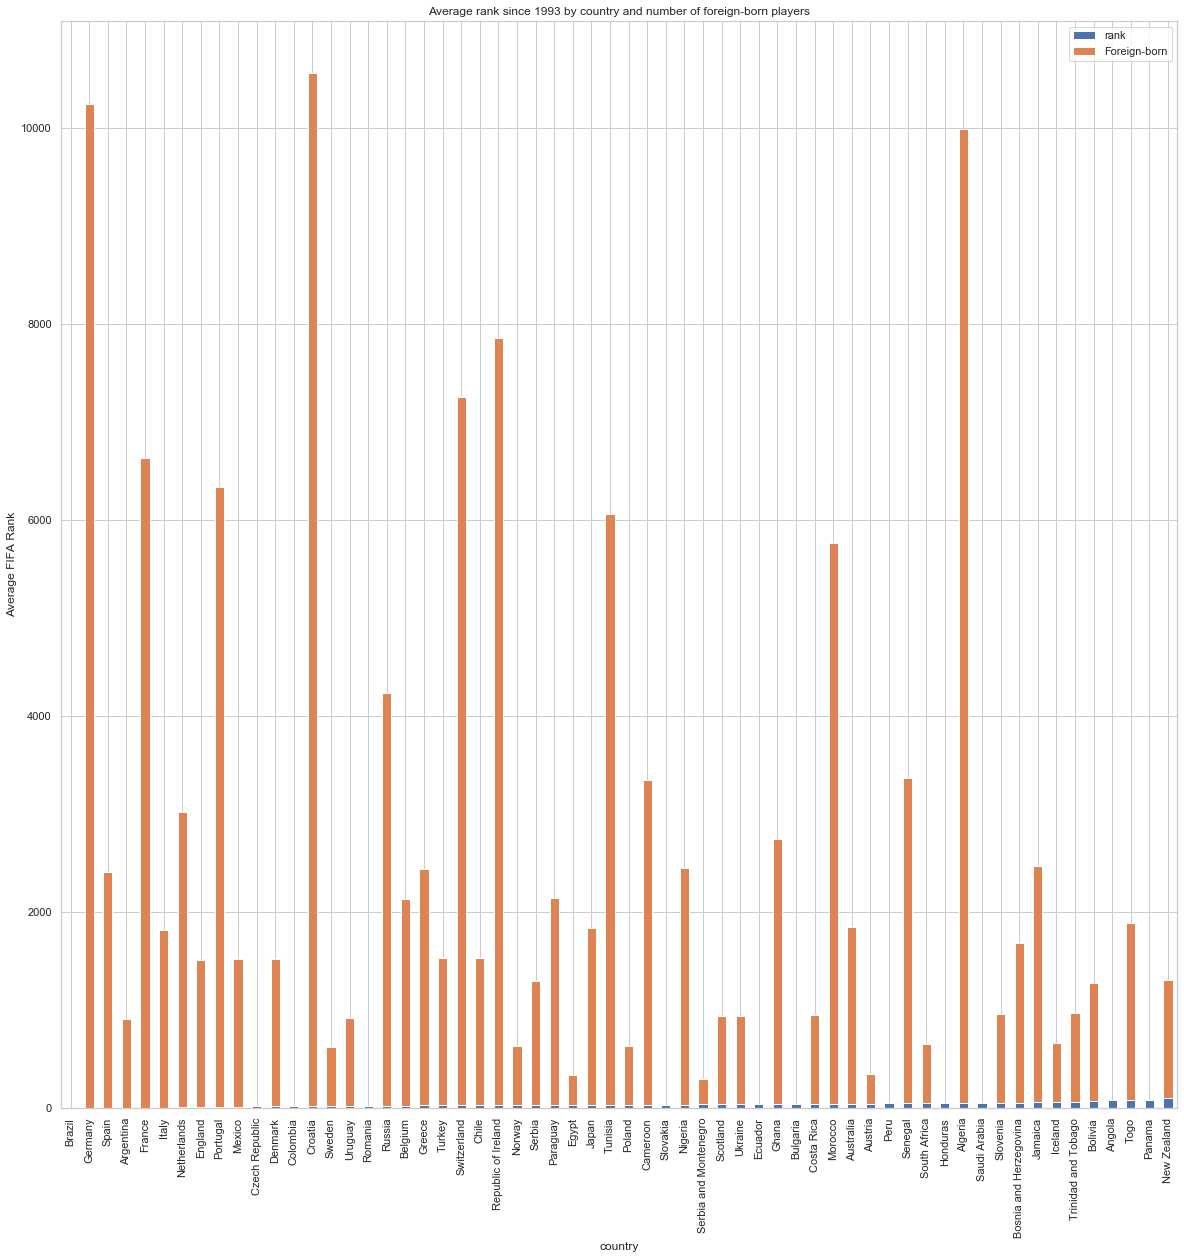

In [196]:
_ = sort_df.plot(kind = 'bar', figsize = (20, 20), stacked = True)
_ = plt.ylabel('Average FIFA Rank')
_ = plt.title('Average rank since 1993 by country and number of foreign-born players')

The bar graph above shows no clear correlation between a country's rank and it's proportion of foreign-born players. For example, Brazil which has the highest average rank since 1993 has had no foreign-born players while Panama which also has had no foreign-born players has one of the lowest rankings. Germany, which has the second highest average rank has had foreign-born players while Algeria, which has one of the highest proportions of foreign-born players is ranked in the bottom half.

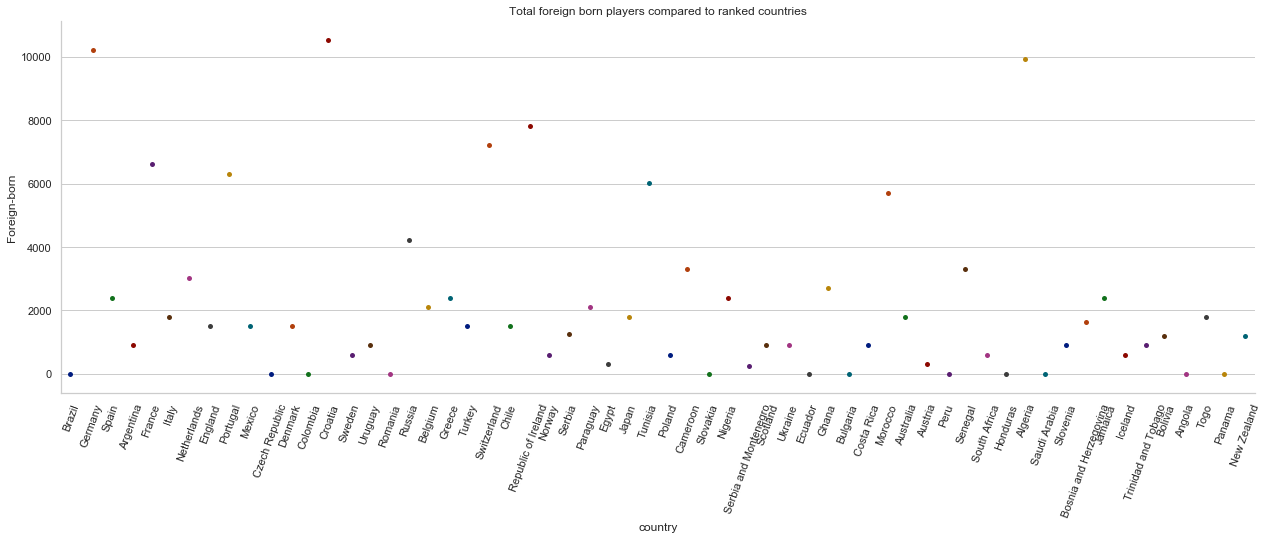

In [197]:
sns.set(style = 'whitegrid')
_= sns.catplot(data = sort_df.reset_index(), x = 'country', y = 'Foreign-born', palette = 'dark', 
               height = 6, aspect = 3)
_.set_xticklabels(rotation=70)
_ = plt.title("Total foreign born players compared to ranked countries")


Aggregating the 'Foreign-born' column above produces some atypical values for the sum of foreign born players. It indicates that Germany and Croatia for example have each had a total of over 10,000 players foreign-born players between 1993 and 2018. Merging on the original dataframes which had duplicate rows resulted in a dataframe that had an inflated number of rows. Dropping duplicates from the original dataframes only resulted in a modest decrease in the final dataframe's number of rows. I decided to aggregate the 'Foreign-born' column with the mean function instead of the sum function. 


In [198]:
sort_df1 = new_df.groupby('country')[['rank', 'Foreign-born']].agg({'rank': 'mean', 'Foreign-born': 'mean'}).sort_values(by = 'rank')

In [199]:
counts1 = sort_df1['Foreign-born'].value_counts()
counts1

0.000000    12
0.260870     3
0.173913     2
0.130435     2
0.028986     2
0.045455     2
0.032609     2
0.036496     1
0.088496     1
0.043478     1
0.217391     1
0.153846     1
0.086957     1
0.031447     1
0.125000     1
0.717391     1
0.283582     1
0.239130     1
0.018868     1
0.065217     1
0.117647     1
0.061947     1
0.114583     1
0.160584     1
0.363636     1
0.054945     1
0.058824     1
0.076923     1
0.073529     1
0.181818     1
0.307018     1
0.219780     1
0.213836     1
0.043796     1
0.210526     1
0.050314     1
0.021978     1
0.577778     1
0.044118     1
0.136364     1
0.184211     1
0.065934     1
Name: Foreign-born, dtype: int64

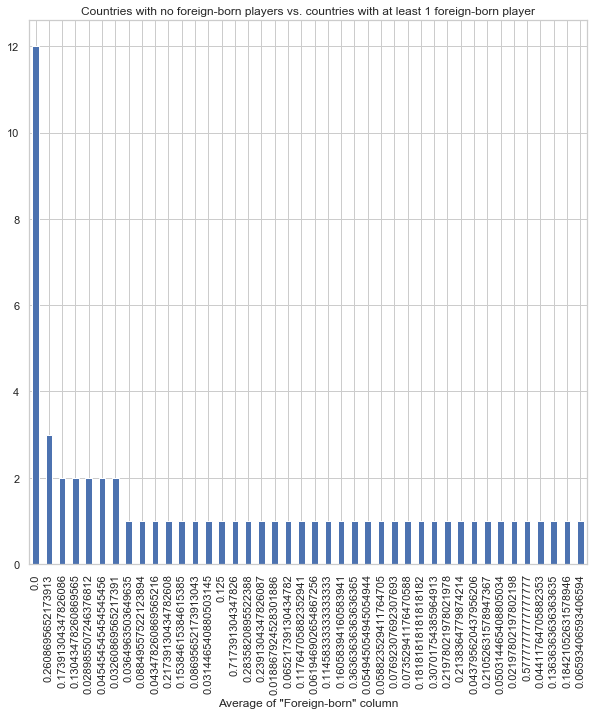

In [200]:
_ = counts1.plot(kind = 'bar', figsize = (10, 10))
_ = plt.title('Countries with no foreign-born players vs. countries with at least 1 foreign-born player')
_ = plt.xlabel('Average of "Foreign-born" column')

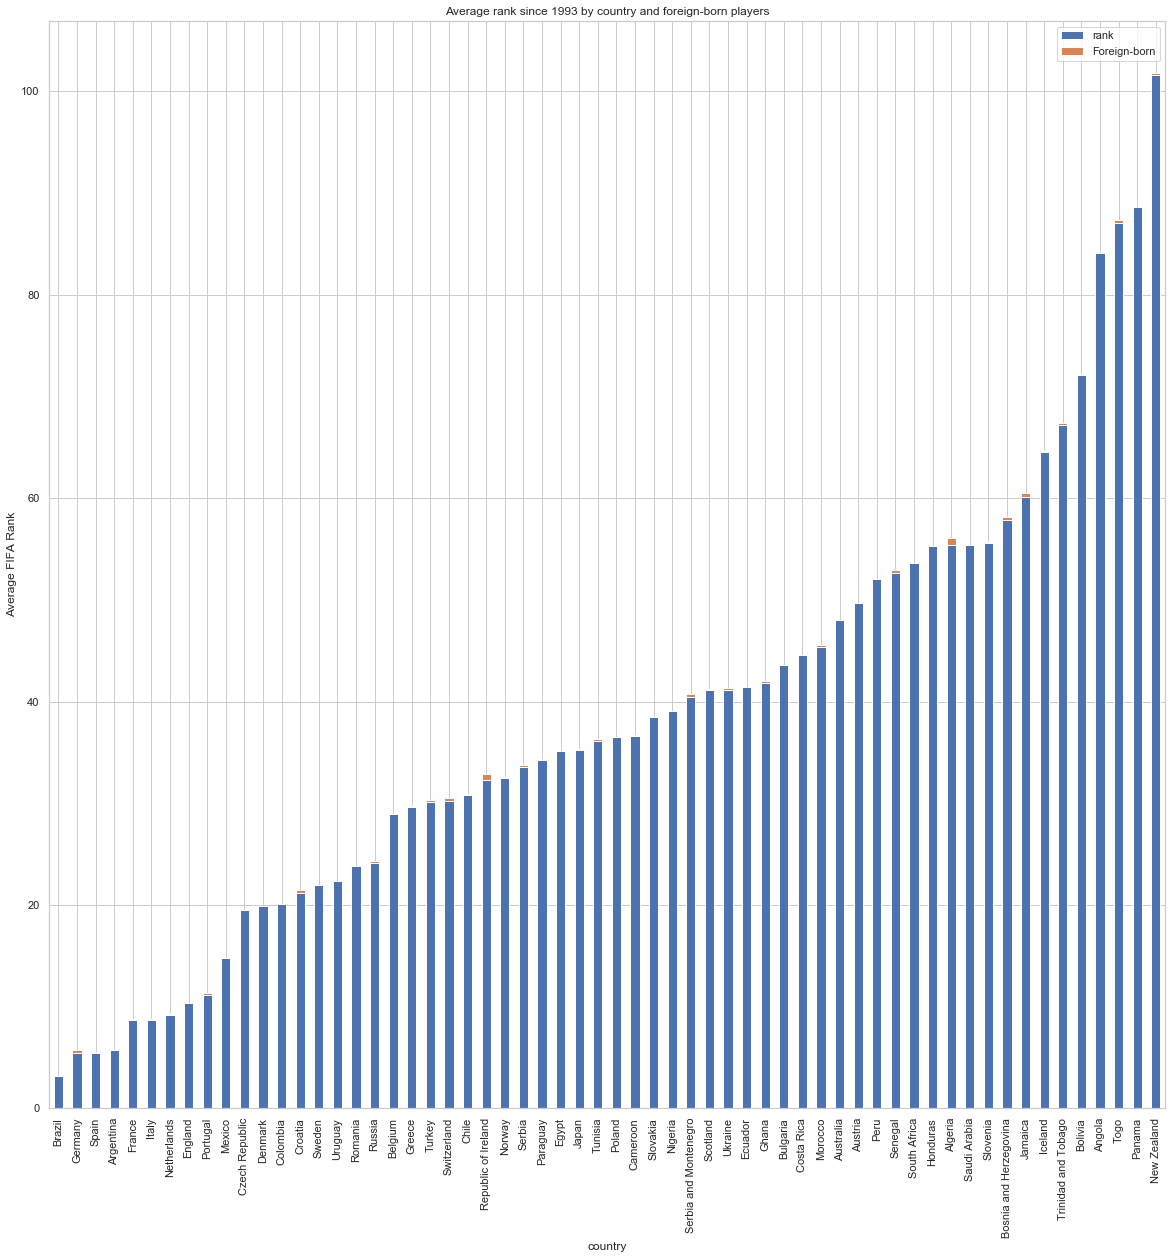

In [201]:
_ = sort_df1.plot(kind = 'bar', figsize = (20, 20), stacked = True)
_ = plt.ylabel('Average FIFA Rank')
_ = plt.title('Average rank since 1993 by country and foreign-born players')

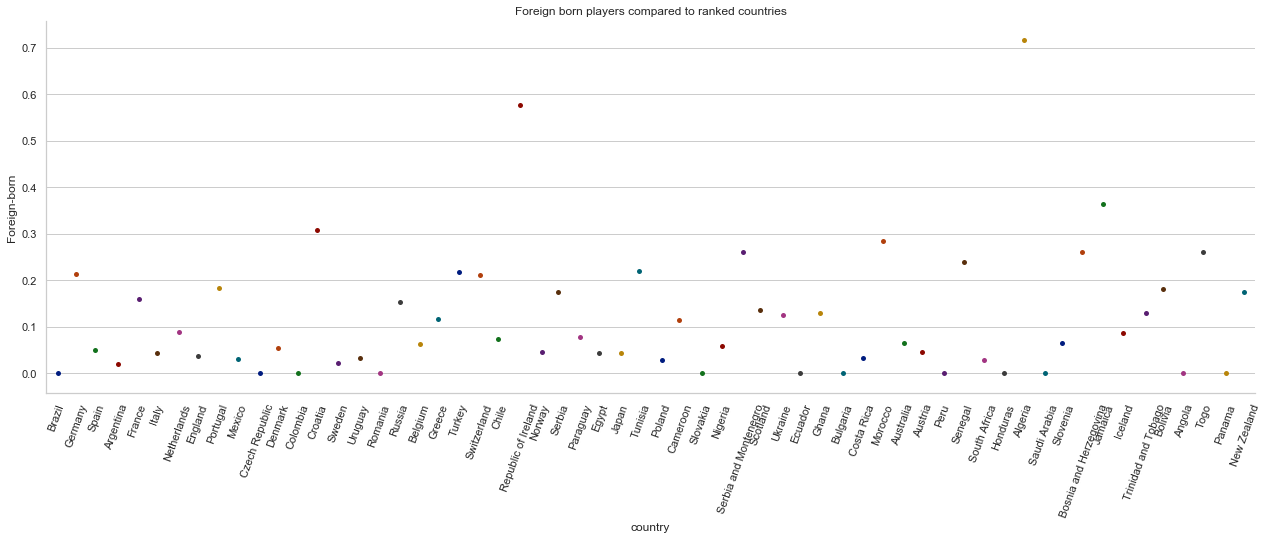

In [202]:
sns.set(style = 'whitegrid')
_= sns.catplot(data = sort_df1.reset_index(), x = 'country', y = 'Foreign-born', palette = 'dark', 
               height = 6, aspect = 3)
_.set_xticklabels(rotation=70)
_ = plt.title("Foreign born players compared to ranked countries")

The majority of countries have had at least 1 foreign-born player on their team. Even after aggregating the 'Foreign-born' column with the mean function, there is still no clear distinction between the rank of countries that have no foreign-born players and countries that have at least one foreign-born player. 